<h3 style="color:darkblue;">Airbnb Price Prediction and Insights</h3>


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/vansh/OneDrive/Documents/Airbnb_data.csv')

In [4]:
# exploring the dataset

In [5]:
print(df.head(5))

         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed     

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [7]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [ ]:
# handling missing values.

In [8]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64

In [9]:
print(df.shape)

(74111, 29)


In [10]:
df.drop(columns=['first_review', 'host_response_rate', 'last_review', 'review_scores_rating'],inplace=True)

In [11]:
df.isnull().sum()

id                           0
log_price                    0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                  200
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
host_has_profile_pic       188
host_identity_verified     188
host_since                 188
instant_bookable             0
latitude                     0
longitude                    0
name                         0
neighbourhood             6872
number_of_reviews            0
thumbnail_url             8216
zipcode                    968
bedrooms                    91
beds                       131
dtype: int64

In [4]:
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['beds'] = df['beds'].fillna(df['beds'].median())

In [6]:
df['zipcode'] = df['zipcode'].fillna(df['zipcode'].mode()[0])
df['neighbourhood'] = df['neighbourhood'].fillna('Unknown')
df['host_since'] = df['host_since'].ffill()
df['host_has_profile_pic'] = df['host_has_profile_pic'].fillna(df['host_has_profile_pic'].mode()[0])
df['host_identity_verified'] = df['host_identity_verified'].fillna(df['host_identity_verified'].mode()[0])
df['thumbnail_url'] = df['thumbnail_url'].fillna('No Image')

In [14]:
df.isnull().sum()

id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
host_has_profile_pic      0
host_identity_verified    0
host_since                0
instant_bookable          0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
thumbnail_url             0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64

In [ ]:
# detecting and handling outliers.

In [15]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'host_has_profile_pic',
       'host_identity_verified', 'host_since', 'instant_bookable', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

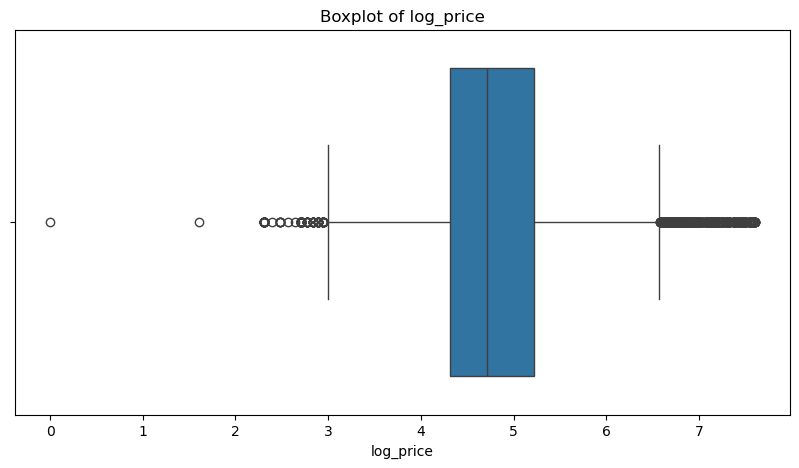

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['log_price'])
plt.title("Boxplot of log_price")
plt.show()

In [17]:
Q1=df['log_price'].quantile(0.25)
Q3=df['log_price'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df=df[(df['log_price']>=lower_bound) & (df['log_price']<=upper_bound)]

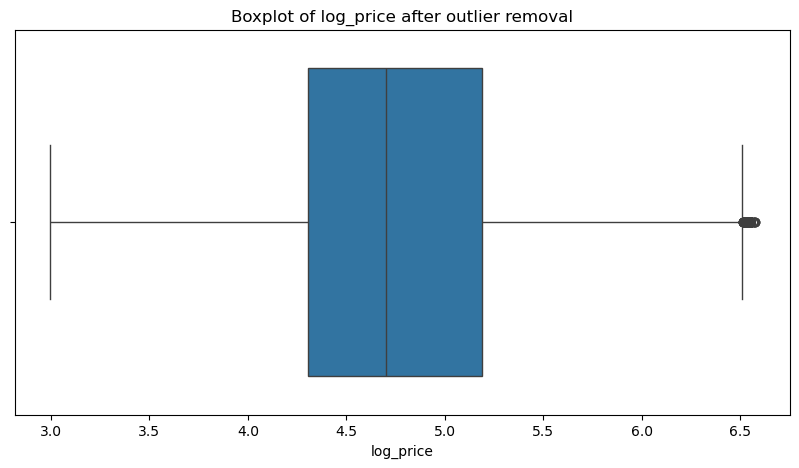

count    72579.000000
mean         4.746079
std          0.652274
min          2.995732
25%          4.304065
50%          4.700480
75%          5.187386
max          6.572283
Name: log_price, dtype: float64


In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['log_price'])
plt.title("Boxplot of log_price after outlier removal")
plt.show()
print(df['log_price'].describe())

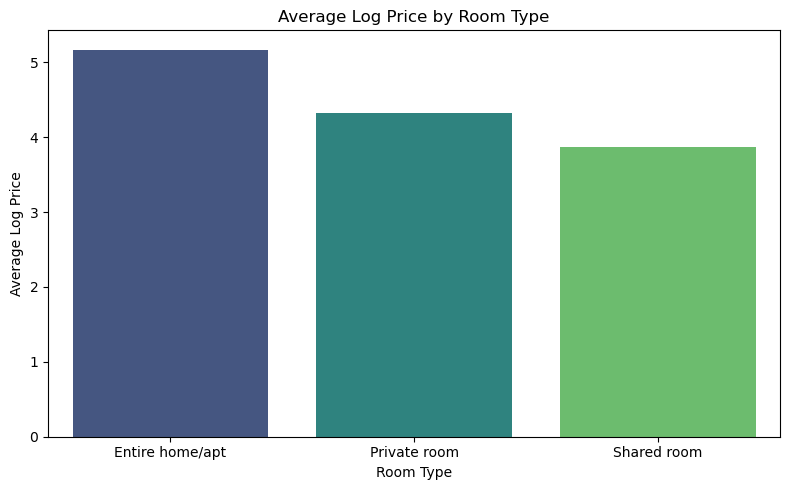

In [8]:
room_price = df.groupby('room_type')['log_price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=room_price.index, y=room_price.values, hue=room_price.index, palette='viridis', legend=False)
plt.title('Average Log Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Log Price')
plt.tight_layout()
plt.show()

Insights from Room Type Pricing
- Entire homes/apartments command the highest average price, indicating guests are willing to pay more for privacy and full-space access.
- Private rooms offer a balance of affordability and privacy, making them a popular mid-tier choice.
- Shared rooms are the most economical option, reflecting minimal privacy and shared space usage.

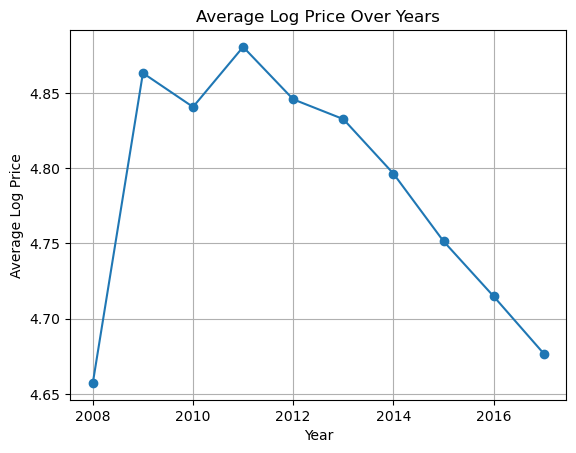

In [12]:
df['host_since'] = pd.to_datetime(df['host_since'], dayfirst=True)
df['year'] = df['host_since'].dt.year
yearly_avg_price = df.groupby('year')['log_price'].mean()

yearly_avg_price.plot(kind='line', marker='o')
plt.title('Average Log Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Log Price')
plt.grid(True)
plt.show()

Insights: Average Log Price Over the Years:
From 2008 to 2011, the average log price of Airbnb listings increased,
peaking in 2011. However, a steady decline followed, reaching the lowest in 2017.
This trend suggests a shift toward more affordable listings or increased competition over time.

In [19]:
# feature engineering:-neighborhood popularity, number of amenities, and host activity metrics.

In [20]:
neighbourhood_count=df['neighbourhood'].value_counts()
df['neighbourhood_popularity']=df['neighbourhood'].map(neighbourhood_count)
print(df[['neighbourhood', 'neighbourhood_popularity']].head(10))

        neighbourhood  neighbourhood_popularity
0    Brooklyn Heights                       108
1      Hell's Kitchen                      1283
2              Harlem                      1365
4    Columbia Heights                       283
5          Noe Valley                       304
6             Unknown                      6695
7            Downtown                       533
8   Richmond District                       379
9             Unknown                      6695
10      Alphabet City                       616


In [21]:
df['num_amenities'] = df['amenities'].str.count(',') + 1
print(df[['amenities', 'num_amenities']].head(10))

                                            amenities  num_amenities
0   {"Wireless Internet","Air conditioning",Kitche...              9
1   {"Wireless Internet","Air conditioning",Kitche...             15
2   {TV,"Cable TV","Wireless Internet","Air condit...             19
4   {TV,Internet,"Wireless Internet","Air conditio...             12
5   {TV,"Wireless Internet",Heating,"Smoke detecto...             10
6   {TV,Internet,"Wireless Internet","Air conditio...             21
7   {TV,"Cable TV","Wireless Internet","Wheelchair...             26
8   {TV,"Cable TV","Wireless Internet","Pets live ...             21
9   {"Wireless Internet","Air conditioning",Kitche...             13
10  {Internet,"Wireless Internet","Air conditionin...             15


In [22]:
df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': 1, 'f': 0})

In [27]:
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
df['host_experience_years'] = 2025 - df['host_since'].dt.year
df['host_experience_years'] = df['host_experience_years'].fillna(0)

C:\Users\vansh\AppData\Local\Temp\ipykernel_29492\1431272606.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')


In [28]:
host_activity_features = [
    'host_identity_verified',
    'host_has_profile_pic',
    'host_experience_years'
]

In [ ]:
# transformations.

In [ ]:
#one hot encoding.

In [29]:
df=pd.get_dummies(df,columns=['room_type','property_type'],drop_first=True)

In [30]:
print(df.columns)

Index(['id', 'log_price', 'amenities', 'accommodates', 'bathrooms', 'bed_type',
       'cancellation_policy', 'cleaning_fee', 'city', 'description',
       'host_has_profile_pic', 'host_identity_verified', 'host_since',
       'instant_bookable', 'latitude', 'longitude', 'name', 'neighbourhood',
       'number_of_reviews', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'neighbourhood_popularity', 'num_amenities', 'host_experience_years',
       'room_type_Private room', 'room_type_Shared room',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Boutique hotel', 'property_type_Bungalow',
       'property_type_Cabin', 'property_type_Camper/RV',
       'property_type_Casa particular', 'property_type_Castle',
       'property_type_Cave', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Earth House', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'p

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
feature_cols = [
    'number_of_reviews',
    'num_amenities',
    'host_identity_verified',
    'host_has_profile_pic',
    'host_experience_years',
    'neighbourhood_popularity',
    'room_type_Private room',
    'room_type_Shared room',
    'property_type_Bungalow',
    'property_type_House',
    'property_type_Hostel'
]

X = df[feature_cols]
y = df['log_price']

In [36]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [38]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_prd= lr.predict(X_test)

In [39]:
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_prd))
lr_mae = mean_absolute_error(y_test, lr_prd)
lr_r2 = r2_score(y_test, lr_prd)

print("Linear Regression Results:")
print(f"RMSE: {lr_rmse:.3f}")
print(f"MAE: {lr_mae:.3f}")
print(f"R² Score: {lr_r2:.3f}")

Linear Regression Results:
RMSE: 0.503
MAE: 0.394
R² Score: 0.408


In [40]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [41]:
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Regressor Results:")
print(f"RMSE: {rf_rmse:.3f}")
print(f"MAE: {rf_mae:.3f}")
print(f"R² Score: {rf_r2:.3f}")

Random Forest Regressor Results:
RMSE: 0.482
MAE: 0.368
R² Score: 0.459


<h3 style="color:darkblue;"> Final Conclusion</h3>

In this project, i have aimed to build a regression model to predict Airbnb listing prices using various features such as property type, room type, number of reviews, amenities, and host activity metrics. After thorough data preprocessing and feature engineering, i have developed and evaluated two models: Linear Regression and Random Forest Regressor. While Linear Regression provided a basic understanding of the data, the Random Forest Regressor delivered significantly better performance across all evaluation metrics, including RMSE, MAE, and R² Score.
<br>
Hence, Random Forest Regressor was selected as the final model due to its ability to capture complex, non-linear relationships in the data. This model can be further enhanced by tuning hyperparameters or incorporating more contextual features like seasonal trends or location-based clustering. Overall, the model provides a strong foundation for accurate and data-driven price prediction for Airbnb listings.